In [1]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft, fftfreq, fftshift
from scipy import signal
from scipy.optimize import curve_fit
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
def createFourierTransform(dataFrame, dt):
    #dt = dataFrame['Time'][4] - dataFrame['Time'][3]
    n = len(dataFrame['mz'])

    mx_Fk = np.fft.fft(dataFrame['mx'])/n
    my_Fk = np.fft.fft(dataFrame['my'])/n
    mz_Fk = np.fft.fft(dataFrame['mz'])/n
    nu = np.fft.fftfreq(n, dt)
    
    mx_fft = np.absolute(np.fft.fftshift(mx_Fk))
    my_fft = np.absolute(np.fft.fftshift(my_Fk))
    mz_fft = np.absolute(np.fft.fftshift(mz_Fk))
    nu = np.fft.fftshift(nu)

    return nu, mx_fft, my_fft, mz_fft

In [3]:
def cleanData(data):
    if(type(data['Time'][0]) == str):
        data['Time'] = data['Time'].str.strip()
        data['mx'] = data['mx'].str.strip()
        data['my'] = data['my'].str.strip()
        data['mz'] = data['mz'].str.strip()
        data['Time'] = pd.to_numeric(data['Time'], errors='coerce')
        data['mx'] = pd.to_numeric(data['mx'], errors='coerce')
        data['my'] = pd.to_numeric(data['my'], errors='coerce')
        data['mz'] = pd.to_numeric(data['mz'], errors='coerce')
        data.dropna(inplace = True)
        data.sort_values('Time')


In [5]:
data700 = pd.read_csv("./data/pulse_DCField=700.csv")
data700 = data700[[' Oxs_TimeDriver::Simulation time (s)', ' Oxs_TimeDriver::mx', ' Oxs_TimeDriver::my', ' Oxs_TimeDriver::mz']]
data700.columns = ['Time', 'mx', 'my', 'mz']


data800 = pd.read_csv("./data/pulse_DCField=800.csv")
data800 = data800[[' Oxs_TimeDriver::Simulation time (s)', ' Oxs_TimeDriver::mx', ' Oxs_TimeDriver::my', ' Oxs_TimeDriver::mz']]
data800.columns = ['Time', 'mx', 'my', 'mz']

data900 = pd.read_csv("./data/pulse_DCField=900.csv")
data900 = data900[[' Oxs_TimeDriver::Simulation time (s)', ' Oxs_TimeDriver::mx', ' Oxs_TimeDriver::my', ' Oxs_TimeDriver::mz']]
data900.columns = ['Time', 'mx', 'my', 'mz']

data1000 = pd.read_csv("./data/pulse_DCField=1000.csv")
data1000 = data1000[[' Oxs_TimeDriver::Simulation time (s)', ' Oxs_TimeDriver::mx', ' Oxs_TimeDriver::my', ' Oxs_TimeDriver::mz']]
data1000.columns = ['Time', 'mx', 'my', 'mz']

data1600 = pd.read_csv("./data/pulse_DCField=1600.csv")
data1600 = data1600[[' Oxs_TimeDriver::Simulation time (s)', ' Oxs_TimeDriver::mx', ' Oxs_TimeDriver::my', ' Oxs_TimeDriver::mz']]
data1600.columns = ['Time', 'mx', 'my', 'mz']


cleanData(data800)
cleanData(data900)
cleanData(data1000)
cleanData(data1600)

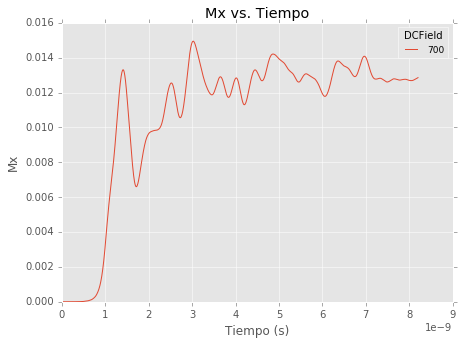

In [6]:
fig = plt.figure(figsize=(7, 5))
plt.plot(data700['Time'], data700['mx'], label='700')
plt.legend(title = 'DCField', loc = 'best', fontsize=9)
plt.title('Mx vs. Tiempo')
plt.ylabel('Mx')
plt.xlabel('Tiempo (s)')

plt.savefig('magnetizations700.png', format='png')

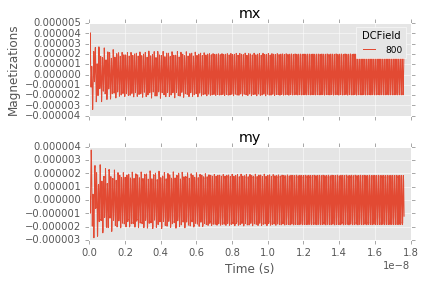

In [7]:
fig = plt.figure(figsize=(7, 5))
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].set_title('mx')
axarr[0].plot(data800['Time'], data800['mx'], label = '800')
#axarr[0].plot(data900['Time'], data900['mx'], label = '900')
#axarr[0].plot(data1000['Time'], data1000['mx'], label = '1000')
#ax1.ylabel('mx')
axarr[0].legend(title = 'DCField', loc = 'upper right', fontsize=9)
axarr[0].set_ylabel('Magnetizations', y=0.5, x=0.1)

axarr[1].set_title('my')
axarr[1].plot(data800['Time'], data800['my'], label = '800')
#axarr[1].plot(data900['Time'], data900['my'], label = '900')
#axarr[1].plot(data1000['Time'], data1000['my'], label = '1000')

#axarr[1].set_xlim(1e-8, 1.1e-8)
axarr[1].set_xlabel('Time (s)')
'''
axarr[2].set_title('mz')
axarr[2].plot(data800['Time'], data800['mz'], label = '800')
#axarr[2].plot(data900['Time'], data900['mz'], label = '900')
#axarr[2].plot(data1000['Time'], data1000['mz'], label = '1000')
axarr[2].set_xlabel('Time (s)')
axarr[2].set_xlim(0, 1.3e-9)
#ax3.ylabel('mz')
'''
plt.tight_layout()

plt.savefig('magnetizations.pdf', format='pdf')
plt.savefig('magnetizations.png', format='png')

In [9]:
freq_800, mx_fft800, my_fft800, mz_fft800 = createFourierTransform(data800, data800['Time'][4]- data800['Time'][3])
freq_900, mx_fft900, my_fft900, mz_fft900 = createFourierTransform(data900, data800['Time'][4]- data800['Time'][3])
freq_1000, mx_fft1000, my_fft1000, mz_fft1000 = createFourierTransform(data1000, data800['Time'][4]- data800['Time'][3])
freq_1600, mx_fft1600, my_fft1600, mz_fft1600 = createFourierTransform(data1600, data800['Time'][4]- data800['Time'][3])

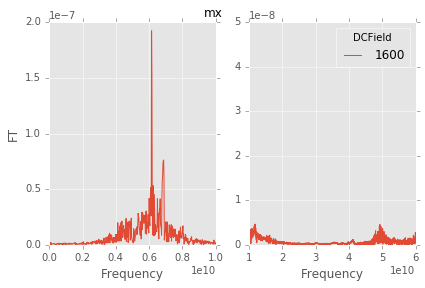

In [10]:
fig1 = plt.figure(figsize=(7, 3))
fig1, (ax1, ax2) = plt.subplots(1, 2)
plt.suptitle('mx', size = 12)

#idx = np.argsort(freq_800)

ax1.set_ylabel('FT')
ax1.set_xlabel('Frequency')
#ax1.plot(freq_800, mx_fft800, label = '800')
ax1.plot(freq_1600, mx_fft1600, label = '1600')
#ax2.plot(freq_800, mx_fft800, label = '800')
ax2.plot(freq_1600, mx_fft1600, label = '1600')
#ax1.set_yscale('log')
ax1.set_xlim([0, 1e10])
ax2.set_xlim([0.1e11, 0.6e11])
ax2.set_ylim([0, 0.5e-7])
ax2.set_xlabel('Frequency')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.legend(title = 'DCField')



plt.tight_layout()
plt.savefig('ftmx.png', format='png')

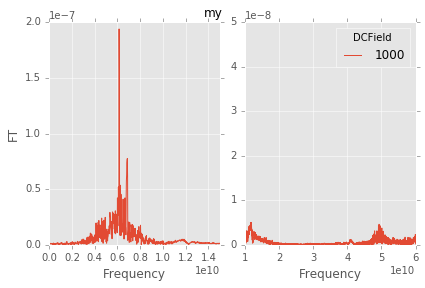

In [11]:
fig2 = plt.figure(figsize=(7, 3))
fig2, (ax1, ax2) = plt.subplots(1, 2)
plt.suptitle('my', size = 12)
#plt.xlabel('Frequency')
ax1.set_ylabel('FT')
ax1.set_xlabel('Frequency')
#ax1.plot(freq_800, my_fft800, label = '800')
ax1.plot(freq_1600, my_fft1600, label = '1000')
#ax2.plot(freq_800, my_fft800, label = '800')
ax2.plot(freq_1600, my_fft1600, label = '1000')
ax1.set_xlim([0, 1.5e10])
ax2.set_xlim([1e10, 6e10])
ax2.set_ylim([0, 0.5e-7])
ax2.set_xlabel('Frequency')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.legend(title = 'DCField')



plt.tight_layout()
plt.savefig('ftmy.png', format='png')
